In [176]:
import numpy as np
import gurobipy as gb
import matplotlib.pyplot as plt
import networkx as nx
from math import sqrt
from itertools import permutations
import random
from termcolor import colored
import pandas as pd
from geopy.geocoders import Nominatim
import csv
import shutil
import geopandas as gpd
import networkx as nx
import osmnx as ox
import pyrematch as re
from shapely.geometry import shape
from time import time 
from pyproj import CRS
from collections import OrderedDict
import operator
from functools import reduce
from gurobipy import Model, GRB, quicksum

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [177]:
nodos = pd.read_csv("DFNodosCercanos.csv")

diccionario_nodos = {}
list_id = []
i = 0
for row in nodos.iterrows():
    list_id.append(row[1][3])
    diccionario_nodos[row[1][3]] = i
    i+=1

ClientesAprox = pd.read_csv("DFNodosCercanos.csv")
coordX =[]
coordY =[]
for row in ClientesAprox.iterrows():
    coordX.append(row[1][1])
    coordY.append(row[1][2])

In [553]:
#lista de pares de nodos originales de Santiago bajo minimizaciones de tiempo, con k = 4
dic_grafo = {(267454352, 613890784): [1.107842284080475, 30260.573285700008], (3536637293, 613890784): [1.573052159034377, 33922.33234079999], (4765300244, 613890784): [1.3499062228787253, 29566.812953099998], (376264329, 613890784): [0.044803765422973624, 864.8283843000002], (7326370340, 613890784): [0.9392413710588317, 25320.3465372], (1260237000, 613890784): [0.7356853526532039, 12904.440396600003], (6104118724, 613890784): [1.6645861955181984, 29765.98639290001], (3485642555, 613890784): [1.4506308618039432, 34834.22049089999], (4789079544, 613890784): [0.9708169610139221, 25959.819710100004], (1552735798, 613890784): [1.3412835642151044, 33016.685972399995], (267454352, 376264329): [1.0630385186575015, 29395.7449014], (613890784, 376264329): [0.10404174007959405, 1849.8422688], (3536637293, 376264329): [1.5282483936114035, 33057.5039565], (4765300244, 376264329): [1.305102457455752, 28701.98456879999], (7326370340, 376264329): [0.8944376056358576, 24455.518152899993], (1260237000, 376264329): [0.7459193010385212, 13070.397675899998], (6104118724, 376264329): [1.6748201439035153, 29931.94367220001], (3485642555, 376264329): [1.4058270963809691, 33969.3921066], (4789079544, 376264329): [0.9260131955909481, 25094.991325799998], (1552735798, 376264329): [1.2964797987921304, 32151.857588099992], (267454352, 7326370340): [0.3856830752667312, 8778.204515400002], (613890784, 7326370340): [1.010846845637269, 25628.593536], (3536637293, 7326370340): [2.3410172825670372, 53274.01083329999], (4765300244, 7326370340): [2.117871346411385, 48918.491445600004], (376264329, 7326370340): [1.0079262782236804, 25394.601994200002], (1260237000, 7326370340): [0.6490777244327551, 17425.895189699997], (6104118724, 7326370340): [0.5465348671232679, 9507.283476300003], (3485642555, 7326370340): [0.52818963010182, 9873.139894200003], (4789079544, 7326370340): [0.1864897198222187, 3203.4352284], (1552735798, 7326370340): [0.4188423325129813, 8055.605375699999], (267454352, 1260237000): [0.9503178150261549, 23993.20169610003], (613890784, 1260237000): [0.7302664918955112, 12952.775282099996], (3536637293, 1260237000): [2.284716725936349, 47086.10583569997], (4765300244, 1260237000): [2.0615707897806965, 42730.58644799999], (376264329, 1260237000): [0.7640250905912969, 13391.493660899996], (7326370340, 1260237000): [0.7817169020045114, 19052.974947599992], (6104118724, 1260237000): [0.8063076265931253, 15662.550041699986], (3485642555, 1260237000): [0.9153890409475658, 18573.07830870001], (4789079544, 1260237000): [0.8132924919596018, 19692.448120500005], (1552735798, 1260237000): [0.8060417433587271, 16755.543790199987], (267454352, 6104118724): [0.7812726368429248, 16386.179828099997], (613890784, 6104118724): [1.6544033926048303, 31362.010359600004], (3536637293, 6104118724): [2.244555140711754, 56796.54251490001], (4765300244, 6104118724): [2.022658161709977, 52411.6696401], (376264329, 6104118724): [1.6881619913006167, 31800.728738400005], (7326370340, 6104118724): [0.5545175346728041, 9889.639248300007], (1260237000, 6104118724): [0.6910486942861752, 15147.374662200002], (3485642555, 6104118724): [0.5077544436589582, 9462.698034600002], (4789079544, 6104118724): [0.7004705734296683, 12408.839584199999], (1552735798, 6104118724): [0.3984071460701195, 7645.1635160999995], (267454352, 6993554475): [1.9125330212141276, 46795.22285339997], (613890784, 6993554475): [1.0339043401507106, 22830.74287469999], (3536637293, 6993554475): [1.2335144062117827, 23701.003706399988], (4765300244, 6993554475): [1.0103684700561302, 19345.48431869999], (376264329, 6993554475): [0.9525389502176284, 21361.56050729999], (7326370340, 6993554475): [1.9351139013495804, 44780.99436599998], (1260237000, 6993554475): [1.6904874733770372, 34290.89082870001], (6104118724, 6993554475): [1.957252521921061, 46500.43988340006], (3485642555, 6993554475): [1.8711755160897225, 46865.82279570005], (4789079544, 6993554475): [1.9666894913046713, 45420.467538899975], (1552735798, 6993554475): [1.7618282185008838, 45048.288277200045], (267454352, 3485642555): [0.7902295357483293, 16994.094110099995], (613890784, 3485642555): [1.5395424804624713, 35425.8374307], (3536637293, 3485642555): [2.080009007099428, 58687.88857889999], (4765300244, 3485642555): [1.8568630709437766, 54332.369191199985], (376264329, 3485642555): [1.530864030736534, 35207.920631999994], (7326370340, 3485642555): [0.5646968610231423, 10507.706880000003], (1260237000, 3485642555): [0.8503172546078721, 17803.0089459], (6104118724, 3485642555): [0.475828386298223, 9068.190667800001], (4789079544, 3485642555): [0.7094274723350726, 13016.753866200002], (1552735798, 3485642555): [0.10934729758883868, 1817.5345184999999], (267454352, 4789079544): [0.2562385922049137, 6730.0045746000005], (613890784, 4789079544): [1.0258635769050914, 26244.00799230001], (3536637293, 4789079544): [2.35603401383486, 53889.42528959999], (4765300244, 4789079544): [2.132888077679208, 49533.905901900005], (376264329, 4789079544): [1.0229430094915029, 26010.01645050001], (7326370340, 4789079544): [0.16822475173372314, 3158.4882239999997], (1260237000, 4789079544): [0.6640944557005777, 18041.309645999998], (6104118724, 4789079544): [0.6872009705146097, 12324.302107500002], (3485642555, 4789079544): [0.668855733493162, 12690.158525400002], (1552735798, 4789079544): [0.5595084359043233, 10872.624006899998], (267454352, 1552735798): [0.6808822381594906, 15176.559591599997], (613890784, 1552735798): [1.4301951828736321, 33608.30291219999], (3536637293, 1552735798): [1.9706617095105896, 56870.354060399986], (4765300244, 1552735798): [1.747515773354938, 52514.83467269998], (376264329, 1552735798): [1.4215167331476948, 33390.38611349999], (7326370340, 1552735798): [0.45534956343430355, 8690.172361500001], (1260237000, 1552735798): [0.7409699570190332, 15985.474427400002], (6104118724, 1552735798): [0.36648108870938423, 7250.6561493], (3485642555, 1552735798): [0.10934729758883868, 1817.5345185], (4789079544, 1552735798): [0.6000801747462337, 11199.219347700002]}

In [714]:
#Construye lista de pares con nodos de la nueva red
pares = dic_grafo.keys()
dic_grafo_nodos = {}
for par in pares:
    dic_grafo_nodos[(diccionario_nodos[par[1]],diccionario_nodos[par[0]])] = [dic_grafo[par][0], dic_grafo[par][1]]
    if (267454352, par[1]) in pares and par[1]!= 267454352:
        dic_grafo_nodos[(0,diccionario_nodos[par[1]])] = [dic_grafo[(267454352, par[1])][0], dic_grafo[(267454352, par[1])][1]]
print(dic_grafo_nodos)    


{(1, 0): [1.107842284080475, 30260.573285700008], (0, 1): [1.107842284080475, 30260.573285700008], (1, 2): [1.573052159034377, 33922.33234079999], (1, 3): [1.3499062228787253, 29566.812953099998], (1, 4): [0.044803765422973624, 864.8283843000002], (1, 5): [0.9392413710588317, 25320.3465372], (1, 6): [0.7356853526532039, 12904.440396600003], (1, 7): [1.6645861955181984, 29765.98639290001], (1, 9): [1.4506308618039432, 34834.22049089999], (1, 10): [0.9708169610139221, 25959.819710100004], (1, 11): [1.3412835642151044, 33016.685972399995], (4, 0): [1.0630385186575015, 29395.7449014], (0, 4): [1.0630385186575015, 29395.7449014], (4, 1): [0.10404174007959405, 1849.8422688], (4, 2): [1.5282483936114035, 33057.5039565], (4, 3): [1.305102457455752, 28701.98456879999], (4, 5): [0.8944376056358576, 24455.518152899993], (4, 6): [0.7459193010385212, 13070.397675899998], (4, 7): [1.6748201439035153, 29931.94367220001], (4, 9): [1.4058270963809691, 33969.3921066], (4, 10): [0.9260131955909481, 25094

In [715]:
'''###########################   DATOS   ###########################'''

contador = 0
demanda = [1,1,1,1,1,1,1,1,1,1,1] #Cambiar a demandas 'reales o mejor proporcionadas'

cantidadNodos = len(coordX)
nodos = range(cantidadNodos)
n = cantidadNodos-1  # number of clients
clientes = range(1, cantidadNodos)
vehiculos = 3
capacidad = 2500

matriz_tiempos = np.zeros((cantidadNodos, cantidadNodos))
for i in nodos:
    for j in range(i + 1, cantidadNodos):
        if (i, j) in dic_grafo_nodos.keys():
            matriz_tiempos[i][j] = dic_grafo_nodos[(i,j)][0]
        elif (j, i) in dic_grafo_nodos.keys():
            matriz_tiempos[j][i] = dic_grafo_nodos[(j,i)][0]
            
matriz_costos = np.ones((cantidadNodos, cantidadNodos))*200000
for i in nodos:
    for j in range(i + 1, cantidadNodos):
        if (i, j) in dic_grafo_nodos.keys():
            matriz_costos[i][j] = dic_grafo_nodos[(i,j)][1]
        elif (j, i) in dic_grafo_nodos.keys():
            matriz_costos[j][i] = dic_grafo_nodos[(j,i)][1]

def distanciaRuta(ruta):
    global matriz
    distanciaTotal = 0
    for r in ruta:
        distanciaTotal += matriz[r[0]][r[1]]
    return distanciaTotal

In [613]:
#print(matriz_tiempos)

In [614]:
#print(matriz_costos)

In [717]:
N = [i for i in range(1, cantidadNodos)] #clientes
V = [0] + N #nodos
A = dic_grafo_nodos.keys() #arcos
Q = capacidad # capacidad de los vehiculos
q = {i: demanda[i-1] for i in N} #demanda de los clientes

In [617]:
#print(N)
#print(V)
#print(A)
#print(Q)
#print(q)
#print(nodos)

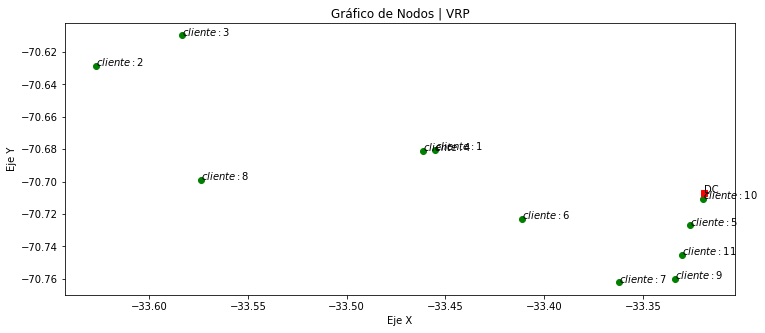

In [718]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(coordX,coordY,color="green")

for i in N:
       plt.annotate('$cliente: %d$'%(i),(coordX[i],coordY[i]))
    
plt.plot(coordX[0],coordY[0],color='red',marker='s')
plt.annotate('DC',(coordX[0],coordY[0]))

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de Nodos | VRP")

plt.show()


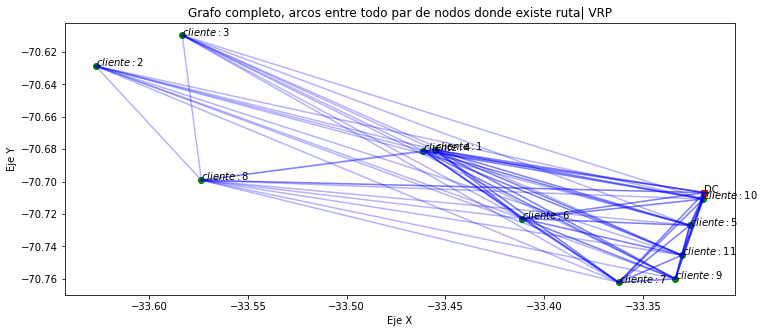

In [719]:
plt.figure(figsize=(12,5))
plt.scatter(coordX,coordY,color="green")

for i in N:
    plt.annotate('$cliente: %d$'%(i),(coordX[i],coordY[i]))
    
plt.plot(coordX[0],coordY[0],color='red',marker='s')
plt.annotate('DC',(coordX[0],coordY[0]))

for i, j in A:
        plt.plot([coordX[i],coordX[j]],[coordY[i],coordY[j]],color="blue",alpha=0.3)
    #plt.annotate('C=%d'%dic_rutas[(i,j)], ((direccion_x[n.index(i)]+direccion_x[n.index(j)])/2, (direccion_y[n.index(i)]+direccion_y[n.index(j)])/2))
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Grafo completo, arcos entre todo par de nodos donde existe ruta| VRP")


plt.show()

In [525]:
#IMPLEMENTAR HEURISTICA

In [720]:
#Modelo
m = Model("VRP")

In [721]:
varX = dict()  # x_(i, j) usar arco "i, j")
for i in nodos:
    varX[i, i] = m.addVar(vtype=gb.GRB.BINARY,
                          lb=0,
                          ub=0,
                          name='x {} {}'.format(i, i))  # caso arco a si mismo

    for j in range(i + 1, cantidadNodos):
        varX[i, j] = m.addVar(vtype=gb.GRB.BINARY,
                              lb=0,
                              ub=1,
                              name='x {} {}'.format(i, j))
        varX[j, i] = m.addVar(vtype=gb.GRB.BINARY,
                              lb=0,
                              ub=1,
                              name='x {} {}'.format(j, i))
m.update()

In [722]:
# Función Objetivo
objetivo = gb.quicksum(matriz_costos[i][j] * varX[i, j] + matriz_costos[j][i] * varX[j, i] for i in nodos for j in range(i + 1, cantidadNodos))
m.setObjective(objetivo, gb.GRB.MINIMIZE)
m.update()

In [723]:
# Restricciones
for i in nodos:  # 1 arco de entrada y 1 de salida
    m.addConstr(gb.quicksum(varX[(i, j)] for j in nodos) == 1)
    m.addConstr(gb.quicksum(varX[(j, i)] for j in nodos) == 1)

m.addConstr(gb.quicksum(matriz_tiempos[i][j] * varX[i, j] + matriz_tiempos[j][i] * varX[j, i] for i in nodos for j in range(i + 1, cantidadNodos)) <= 4)
m.addConstr(gb.quicksum(varX[(0, j)] for j in nodos) <= vehiculos)
m.addConstr(gb.quicksum(varX[(i, 0)] for i in nodos) <= vehiculos)


m.update()

In [724]:
def graf(solucion=[], nombre="VRP", tiempo_total = "tiempo"):  # mostrar gráficamente el estado
    global coordX, coordY, cantidadNodos
    plt.figure(figsize=(12,5))
    plt.scatter(coordX, coordY)

    for n in range(1, cantidadNodos):  # etiquetas en nodos
        plt.annotate('$cliente: %d$'%n, (coordX[n], coordY[n]), color='black', alpha = 1)

    for arco in solucion:  # poner arcos con colores (formato: ((int i, int j), float valor))
        valor = arco[1]
        nodoI = arco[0][0]
        nodoF = arco[0][1]
        x1 = coordX[nodoI]
        y1 = coordY[nodoI]
        x2 = coordX[nodoF]
        y2 = coordY[nodoF]

        if valor > 0.9:
            color = "blue"
        else:
            color = "red"

        plt.arrow(x1, y1, x2 - x1, y2 - y1, color= color, alpha=0.15)
        plt.plot(coordX[0], coordY[0], c='r', marker='s')

    plt.title("{} {} {}".format(nombre, cantidadNodos, tiempo_total))
    plt.show()

In [725]:
def detectSubtoursEnteros(solucionAct):  # encuentra subtours enteros
    global nodos
    print('EL GRAFO QUE PODRIA TENER CORTE+++++++++++++++++++++')
    graf(solucionAct)
    print('Esta es la SolucionAct+++++++++++++++++++++', solucionAct)
    subtoursEncontrados = list()
    dictRoute = {par[0][0]: par[0][1] for par in solucionAct}
    print('Este es el diccionario ++++++++++++', dictRoute)
    tourAct = [0]
    #print('Este es el tourAct ++++++++++++',tourAct)
    nodeAct = 0
    print('Este es nodeAct ++++++++++++', nodeAct)
    faltantes = [i for i in nodos if i != nodeAct]
    while len(dictRoute) > 0:
        #print('nodeAct es +++++++++++++', nodeAct)
        #print('tourAct es +++++++++++++', tourAct)
        nodeNext = dictRoute[nodeAct]
        del dictRoute[nodeAct]
        #print('nodeNext es +++++++++++++', nodeNext)
        if nodeNext == tourAct[0] and tourAct[0]!= 0:
            subtoursEncontrados.append(set(tourAct))
            #print('Subtour encontrado+++++++++++++++++++++++', subtoursEncontrados)
            if len(faltantes) == 0:
                break
            nodeAct = faltantes.pop()
            tourAct = [nodeAct]
        elif nodeNext == tourAct[0] and tourAct[0]== 0:
            print('Este es el diccionario ++++++++++++', dictRoute)
            if len(list(dictRoute.keys())) != 0:
                nodeAct = list(dictRoute.keys())[0]
                print('Este es el nodo ACtualizado ++++++++++++', nodeAct)
                tourAct = [nodeAct]
                print('Este es el tour ACtualizado ++++++++++++', tourAct)
            else:
                break
        else:
            tourAct.append(nodeNext)
            nodeAct = nodeNext
            print('SE QUIERE QUITAR nodo actual:',nodeAct, 'de FALTANTES:', faltantes)
            if nodeAct != 0:
                faltantes.remove(nodeAct)

    if len(subtoursEncontrados) == 0:
        return []
    print('subtourEncontrados son +++++++++++++',subtoursEncontrados)
    return subtoursEncontrados

In [726]:
def delta(listaNodos):  # retorna los arcos que conectan los nodos dentro del conjunto
    return set(permutations(listaNodos, 2))

In [727]:
def Corte(m, where):  # funcion de Callbacks
    global callType, varX
    if where == gb.GRB.callback.MIPSOL:  # soluciones incumbente  
        print('Entra a revisar subtours enteros-----------------------------------------')
        solucionIter = m.cbGetSolution(varX)  # obtener soluciones actual
        solucionX = list()
        for sol in solucionIter:
            if solucionIter[sol] >= 0.9:
                solucionX.append((sol, 1))

        subtours = detectSubtoursEnteros(solucionX)  # encontrar subtours enteros

        for subtour in subtours:
            #print("corte entero")
            m.cbLazy(gb.quicksum(varX[a[0], a[1]] for a in delta(subtour)) <= len(subtour) - 1)


Changed value of parameter TimeLimit to 600.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 27 rows, 144 columns and 375 nonzeros
Variable types: 0 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [4e-02, 2e+00]
  Objective range  [9e+02, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Entra a revisar subtours enteros-----------------------------------------
EL GRAFO QUE PODRIA TENER CORTE+++++++++++++++++++++


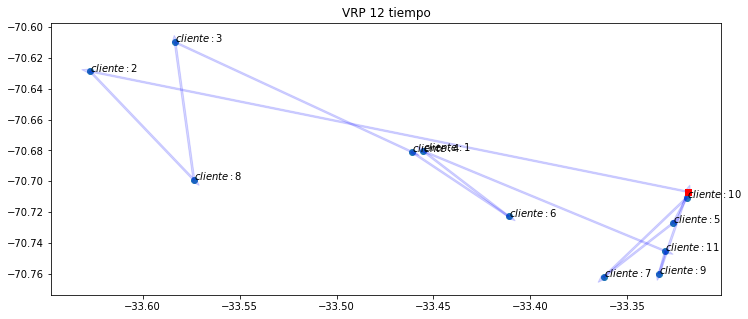

Esta es la SolucionAct+++++++++++++++++++++ [((0, 2), 1), ((9, 0), 1), ((6, 1), 1), ((1, 11), 1), ((2, 8), 1), ((3, 4), 1), ((8, 3), 1), ((4, 6), 1), ((7, 5), 1), ((5, 10), 1), ((10, 7), 1), ((11, 9), 1)]
Este es el diccionario ++++++++++++ {0: 2, 9: 0, 6: 1, 1: 11, 2: 8, 3: 4, 8: 3, 4: 6, 7: 5, 5: 10, 10: 7, 11: 9}
Este es nodeAct ++++++++++++ 0
SE QUIERE QUITAR nodo actual: 2 de FALTANTES: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 8 de FALTANTES: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 3 de FALTANTES: [1, 3, 4, 5, 6, 7, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 4 de FALTANTES: [1, 4, 5, 6, 7, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 6 de FALTANTES: [1, 5, 6, 7, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 1 de FALTANTES: [1, 5, 7, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 11 de FALTANTES: [5, 7, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 9 de FALTANTES: [5, 7, 9, 10]
Este es el diccionario ++++++++++++ {7: 5, 5: 10, 10: 7}
Este es el nodo ACtual

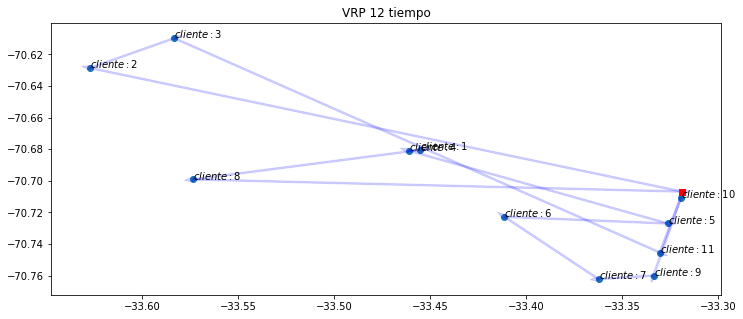

Esta es la SolucionAct+++++++++++++++++++++ [((0, 2), 1), ((8, 0), 1), ((4, 1), 1), ((1, 8), 1), ((2, 3), 1), ((3, 11), 1), ((5, 4), 1), ((6, 5), 1), ((7, 6), 1), ((9, 7), 1), ((10, 9), 1), ((11, 10), 1)]
Este es el diccionario ++++++++++++ {0: 2, 8: 0, 4: 1, 1: 8, 2: 3, 3: 11, 5: 4, 6: 5, 7: 6, 9: 7, 10: 9, 11: 10}
Este es nodeAct ++++++++++++ 0
SE QUIERE QUITAR nodo actual: 2 de FALTANTES: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 3 de FALTANTES: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 11 de FALTANTES: [1, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 10 de FALTANTES: [1, 4, 5, 6, 7, 8, 9, 10]
SE QUIERE QUITAR nodo actual: 9 de FALTANTES: [1, 4, 5, 6, 7, 8, 9]
SE QUIERE QUITAR nodo actual: 7 de FALTANTES: [1, 4, 5, 6, 7, 8]
SE QUIERE QUITAR nodo actual: 6 de FALTANTES: [1, 4, 5, 6, 8]
SE QUIERE QUITAR nodo actual: 5 de FALTANTES: [1, 4, 5, 8]
SE QUIERE QUITAR nodo actual: 4 de FALTANTES: [1, 4, 8]
SE QUIERE QUITAR nodo actual: 

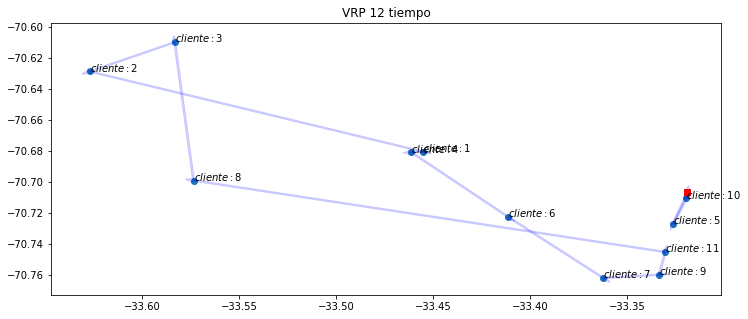

Esta es la SolucionAct+++++++++++++++++++++ [((0, 5), 1), ((10, 0), 1), ((2, 1), 1), ((1, 4), 1), ((3, 2), 1), ((8, 3), 1), ((4, 6), 1), ((5, 10), 1), ((6, 7), 1), ((7, 9), 1), ((11, 8), 1), ((9, 11), 1)]
Este es el diccionario ++++++++++++ {0: 5, 10: 0, 2: 1, 1: 4, 3: 2, 8: 3, 4: 6, 5: 10, 6: 7, 7: 9, 11: 8, 9: 11}
Este es nodeAct ++++++++++++ 0
SE QUIERE QUITAR nodo actual: 5 de FALTANTES: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 10 de FALTANTES: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11]
Este es el diccionario ++++++++++++ {2: 1, 1: 4, 3: 2, 8: 3, 4: 6, 6: 7, 7: 9, 11: 8, 9: 11}
Este es el nodo ACtualizado ++++++++++++ 2
Este es el tour ACtualizado ++++++++++++ [2]
SE QUIERE QUITAR nodo actual: 1 de FALTANTES: [1, 2, 3, 4, 6, 7, 8, 9, 11]
SE QUIERE QUITAR nodo actual: 4 de FALTANTES: [2, 3, 4, 6, 7, 8, 9, 11]
SE QUIERE QUITAR nodo actual: 6 de FALTANTES: [2, 3, 6, 7, 8, 9, 11]
SE QUIERE QUITAR nodo actual: 7 de FALTANTES: [2, 3, 7, 8, 9, 11]
SE QUIERE QUITAR nodo actu

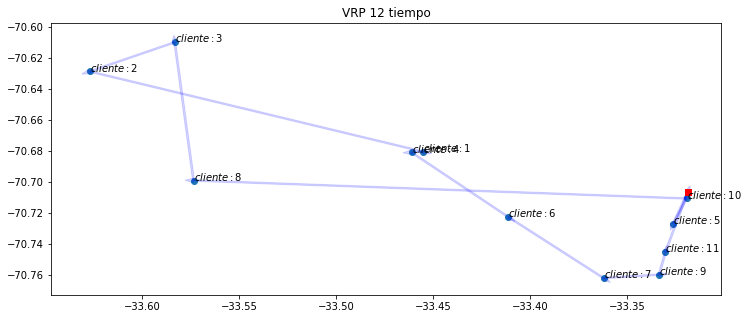

Esta es la SolucionAct+++++++++++++++++++++ [((0, 5), 1), ((11, 0), 1), ((2, 1), 1), ((1, 4), 1), ((3, 2), 1), ((8, 3), 1), ((4, 6), 1), ((5, 10), 1), ((6, 7), 1), ((7, 9), 1), ((10, 8), 1), ((9, 11), 1)]
Este es el diccionario ++++++++++++ {0: 5, 11: 0, 2: 1, 1: 4, 3: 2, 8: 3, 4: 6, 5: 10, 6: 7, 7: 9, 10: 8, 9: 11}
Este es nodeAct ++++++++++++ 0
SE QUIERE QUITAR nodo actual: 5 de FALTANTES: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 10 de FALTANTES: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11]
SE QUIERE QUITAR nodo actual: 8 de FALTANTES: [1, 2, 3, 4, 6, 7, 8, 9, 11]
SE QUIERE QUITAR nodo actual: 3 de FALTANTES: [1, 2, 3, 4, 6, 7, 9, 11]
SE QUIERE QUITAR nodo actual: 2 de FALTANTES: [1, 2, 4, 6, 7, 9, 11]
SE QUIERE QUITAR nodo actual: 1 de FALTANTES: [1, 4, 6, 7, 9, 11]
SE QUIERE QUITAR nodo actual: 4 de FALTANTES: [4, 6, 7, 9, 11]
SE QUIERE QUITAR nodo actual: 6 de FALTANTES: [6, 7, 9, 11]
SE QUIERE QUITAR nodo actual: 7 de FALTANTES: [7, 9, 11]
SE QUIERE QUITAR nodo actua

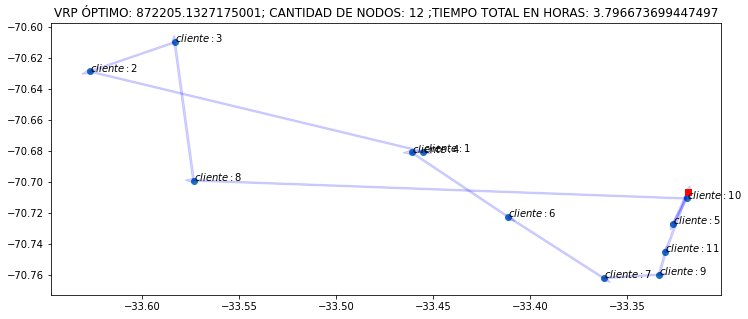

In [728]:
m.Params.TimeLimit = 600  # Tiempo límite para B&C
m.Params.MIPGap = 0  # Hasta qué Gap buscar en B&C
m.params.LazyConstraints = 1  # 1 si usamos cortes dinámicas, 0 en caso contrario (0 por default)
m.optimize(Corte)  # Empezar B&C, (nombre función de cortes)

# A continuación se recompila el resultado y se grafica
arcosOpt = list()
for v in m.getVars():
    #print(v)
    if v.x > 0.0000001:
        #print(v.varName, v.x)
        par = v.varName.split(" ")[1:]
        parFinal = (int(par[0]), int(par[1]))
        arcosOpt.append((parFinal, v.x))
graf(arcosOpt, "VRP ÓPTIMO: {}; CANTIDAD DE NODOS:".format(m.getObjective().getValue()), ";TIEMPO TOTAL EN HORAS: {}".format(gb.quicksum(matriz_tiempos[i][j] * varX[i, j].x + matriz_tiempos[j][i] * varX[j, i].x for i in nodos for j in range(i + 1, cantidadNodos)).getValue()))

In [729]:
print(arcosOpt)

[((0, 5), 1.0), ((11, 0), 1.0), ((2, 1), 1.0), ((1, 4), 1.0), ((3, 2), 1.0), ((8, 3), 1.0), ((4, 6), 1.0), ((5, 10), 1.0), ((6, 7), 1.0), ((7, 9), 1.0), ((10, 8), 1.0), ((9, 11), 1.0)]
